# 1. Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import seaborn as sns

%matplotlib inline

# 2. Importando o DataSet

In [2]:
wine_exp_by_month = pd.read_csv('EXP_2007_2023_20230904_MENSAL.csv', sep=';')
wine_exp_by_year = pd.read_csv('EXP_2007_2023_20230904_ANUAL.csv', sep=';')

# 3. Verificando a estrutura do DataSet

In [3]:
wine_exp_by_month.info()
wine_exp_by_year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3317 entries, 0 to 3316
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        3317 non-null   int64 
 1   Month       3317 non-null   int64 
 2   Country     3317 non-null   object
 3   US$ FOB     3317 non-null   int64 
 4   Net Weight  3317 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 129.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        807 non-null    int64 
 1   Country     807 non-null    object
 2   US$ FOB     807 non-null    int64 
 3   Net Weight  807 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 25.3+ KB


In [4]:
wine_exp_by_month.head()

,Year,Month,Country,US$ FOB,Net Weight
0,2023,6,Paraguay,917728,614615
1,2023,5,Paraguay,729345,495937
2,2023,4,Paraguay,685335,428058
3,2023,7,Paraguay,640784,430523
4,2023,3,Paraguay,366292,233708


In [5]:
wine_exp_by_year.head()

,Year,Country,US$ FOB,Net Weight
0,2023,Paraguay,3752857,2494499
1,2023,Haiti,400780,263386
2,2023,Uruguay,394371,308490
3,2023,Venezuela,163280,105750
4,2023,United States,157439,85667


In [6]:
wine_exp_by_month = wine_exp_by_month.set_index(['Year','Country','Month'])
wine_exp_by_year = wine_exp_by_year.set_index(['Year','Country'])

In [7]:
wine_exp_by_month.head()

US$ FOB  Net Weight
Year Country  Month                     
2023 Paraguay 6       917728      614615
              5       729345      495937
              4       685335      428058
              7       640784      430523
              3       366292      233708

In [8]:
wine_exp_by_year.head()

US$ FOB  Net Weight
Year Country                           
2023 Paraguay       3752857     2494499
     Haiti           400780      263386
     Uruguay         394371      308490
     Venezuela       163280      105750
     United States   157439       85667

In [9]:
wine_exp_by_year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 807 entries, (2023, 'Paraguay') to (2007, 'Togo')
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   US$ FOB     807 non-null    int64
 1   Net Weight  807 non-null    int64
dtypes: int64(2)
memory usage: 20.0+ KB


In [10]:
wine_exp_by_year2 = wine_exp_by_month.groupby(['Year','Country']).agg(sum)

In [11]:
wine_exp_by_year2.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 807 entries, (2007, 'Angola') to (2023, 'Venezuela')
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   US$ FOB     807 non-null    int64
 1   Net Weight  807 non-null    int64
dtypes: int64(2)
memory usage: 15.4+ KB


In [12]:
wine_exp_by_year = wine_exp_by_year.sort_index().sort_values(by = ['Year', 'US$ FOB'], ascending = [False, False]).reindex()
wine_exp_by_year2 = wine_exp_by_year2.sort_index().sort_values(by = ['Year', 'US$ FOB'], ascending = [False, False]).reindex()

In [13]:
wine_exp_by_year.head()

US$ FOB  Net Weight
Year Country                           
2023 Paraguay       3752857     2494499
     Haiti           400780      263386
     Uruguay         394371      308490
     Venezuela       163280      105750
     United States   157439       85667

In [14]:
#wine_exp_by_year = wine_exp_by_year.loc[(wine_exp_by_year['US$ FOB']>=200000 )]

In [15]:
wine_exp_by_year_after_2014 = wine_exp_by_year.query('Year>=2014')
wine_exp_by_year_before_2014 = wine_exp_by_year.query('Year<=2014')
top20countries = ['Paraguay', 'Uruguay', 'Haiti', 'United States', 'United Kingdon', 'Netherlands', 'Germany', 'Belgium', 'Russia', 'Spain', 'China', 'Japan', 'Switzerland', 'Canada', 'Finland']
wine_exp_by_year_after_2014 = wine_exp_by_year_after_2014[(wine_exp_by_year_after_2014.index.isin(top20countries, level=1))]
wine_exp_by_year_before_2014 = wine_exp_by_year_before_2014[(wine_exp_by_year_before_2014.index.isin(top20countries, level=1))]

In [16]:
wine_exp_by_year_after_2014

US$ FOB  Net Weight
Year Country                           
2023 Paraguay       3752857     2494499
     Haiti           400780      263386
     Uruguay         394371      308490
     United States   157439       85667
     China           111440       55906
...                     ...         ...
2014 Japan           401774      106426
     Switzerland     231762       27933
     Canada          226875       35082
     Finland          94962       12960
     Russia           61440      190656

[110 rows x 2 columns]

In [17]:
wine_exp_by_year_before_2014

US$ FOB  Net Weight
Year Country                           
2014 Paraguay        908028      521847
     Netherlands     773767      165289
     Germany         761653      213348
     Belgium         704093      151320
     United States   494216      222267
...                     ...         ...
2007 Russia          173160      266400
     Switzerland      70716       26090
     China            30390        7638
     Canada           18838        4172
     Belgium           3751        1077

[93 rows x 2 columns]

In [18]:
wine_exp_by_year_total = wine_exp_by_year.groupby('Year').agg(sum)

In [19]:
wine_exp_by_year_total.head()

,US$ FOB,Net Weight
Year,,
2007,3686150,3281752
2008,7118100,10346323
2009,9688045,28285359
2010,5298406,10217671
2011,3615120,1214834


In [20]:
wine_exp_by_year_total['US$ FOB per Net Weight'] = wine_exp_by_year_total['US$ FOB'] / wine_exp_by_year_total['Net Weight']
wine_exp_by_year_total.head()

,US$ FOB,Net Weight,US$ FOB per Net Weight
Year,,,
2007,3686150,3281752,1.123226
2008,7118100,10346323,0.687984
2009,9688045,28285359,0.342511
2010,5298406,10217671,0.518553
2011,3615120,1214834,2.975814


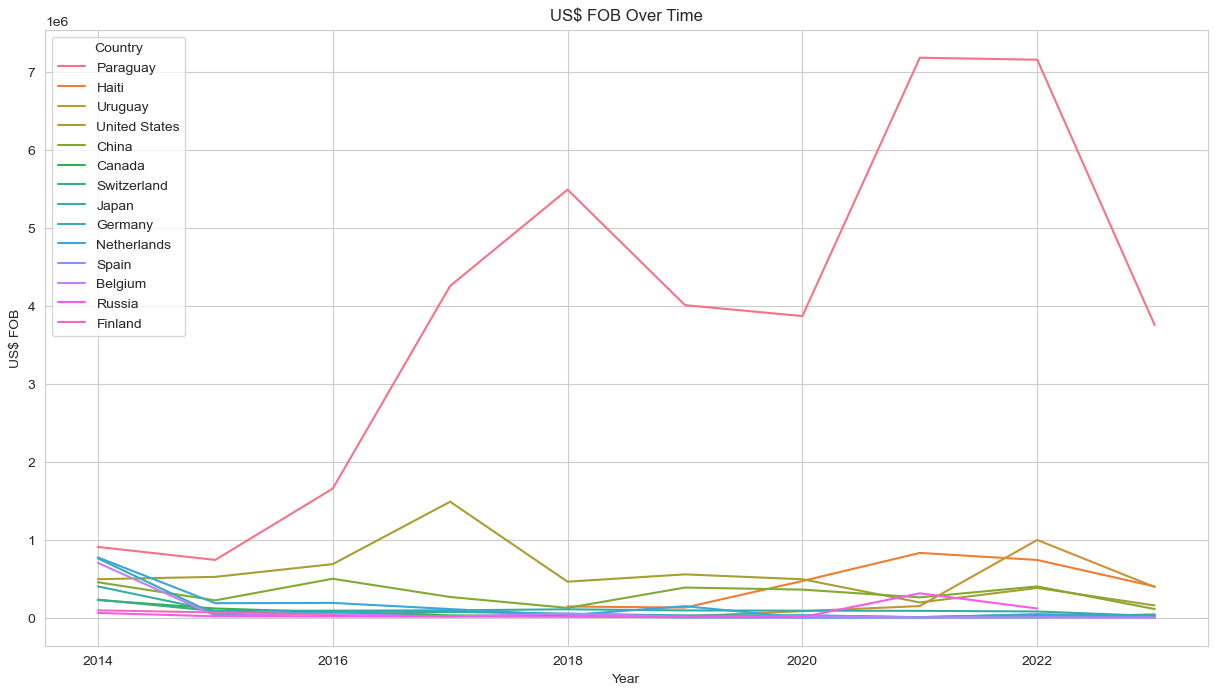

In [21]:

# Set Seaborn style (optional)
sns.set_style("whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(15, 8))  # Specify the figure size
sns.lineplot(data=wine_exp_by_year_after_2014,hue='Country', x='Year', y='US$ FOB', markers='x')
plt.xlabel('Year')
plt.ylabel('US$ FOB')
plt.title('US$ FOB Over Time')
plt.show()

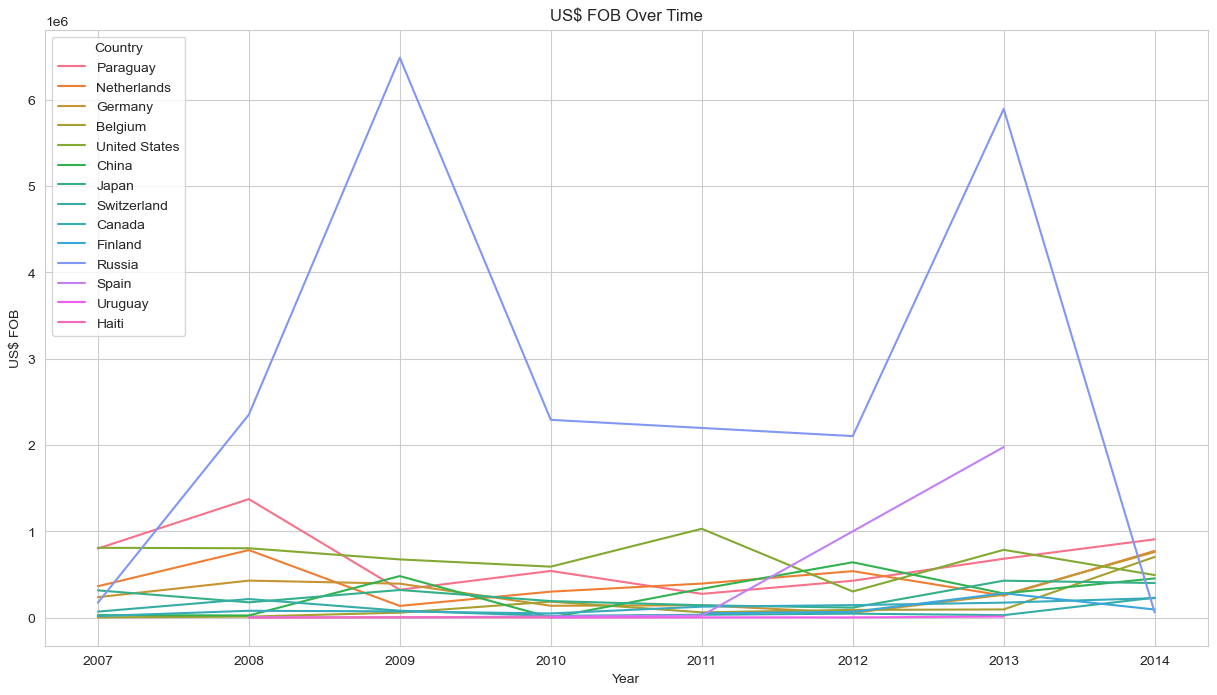

In [22]:

# Set Seaborn style (optional)
sns.set_style("whitegrid")

# Create a line plot using Seaborn
plt.figure(figsize=(15, 8))  # Specify the figure size
sns.lineplot(data=wine_exp_by_year_before_2014,hue='Country', x='Year', y='US$ FOB', markers='x')
plt.xlabel('Year')
plt.ylabel('US$ FOB')
plt.title('US$ FOB Over Time')
plt.show()